## Classification of Pokemon on the basis of Legendary Qualities

### Importing the liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Pokemon Dataset

In [2]:
df = pd.read_csv("Pokemon.csv")

### Data Cleaning

In [3]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
df = df.drop(["#"], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


##### Type 2 column has many null values which can't be filled.

In [6]:
df = df.drop(["Type 2"], axis = 1)

### Data Manipulation and Feature Engineering

In [7]:
df.rename(columns = {"Type 1": "Type"}, inplace = True)

In [8]:
df.head()

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,309,39,52,43,60,50,65,1,False


### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()
df['Type'] = encoder.fit_transform(df['Type'])
df['Legendary'] = encoder.fit_transform(df['Legendary'])

In [11]:
df.head()

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,9,318,45,49,49,65,65,45,1,0
1,Ivysaur,9,405,60,62,63,80,80,60,1,0
2,Venusaur,9,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,9,625,80,100,123,122,120,80,1,0
4,Charmander,6,309,39,52,43,60,50,65,1,0


### Visualisation to find correlation between features and labels

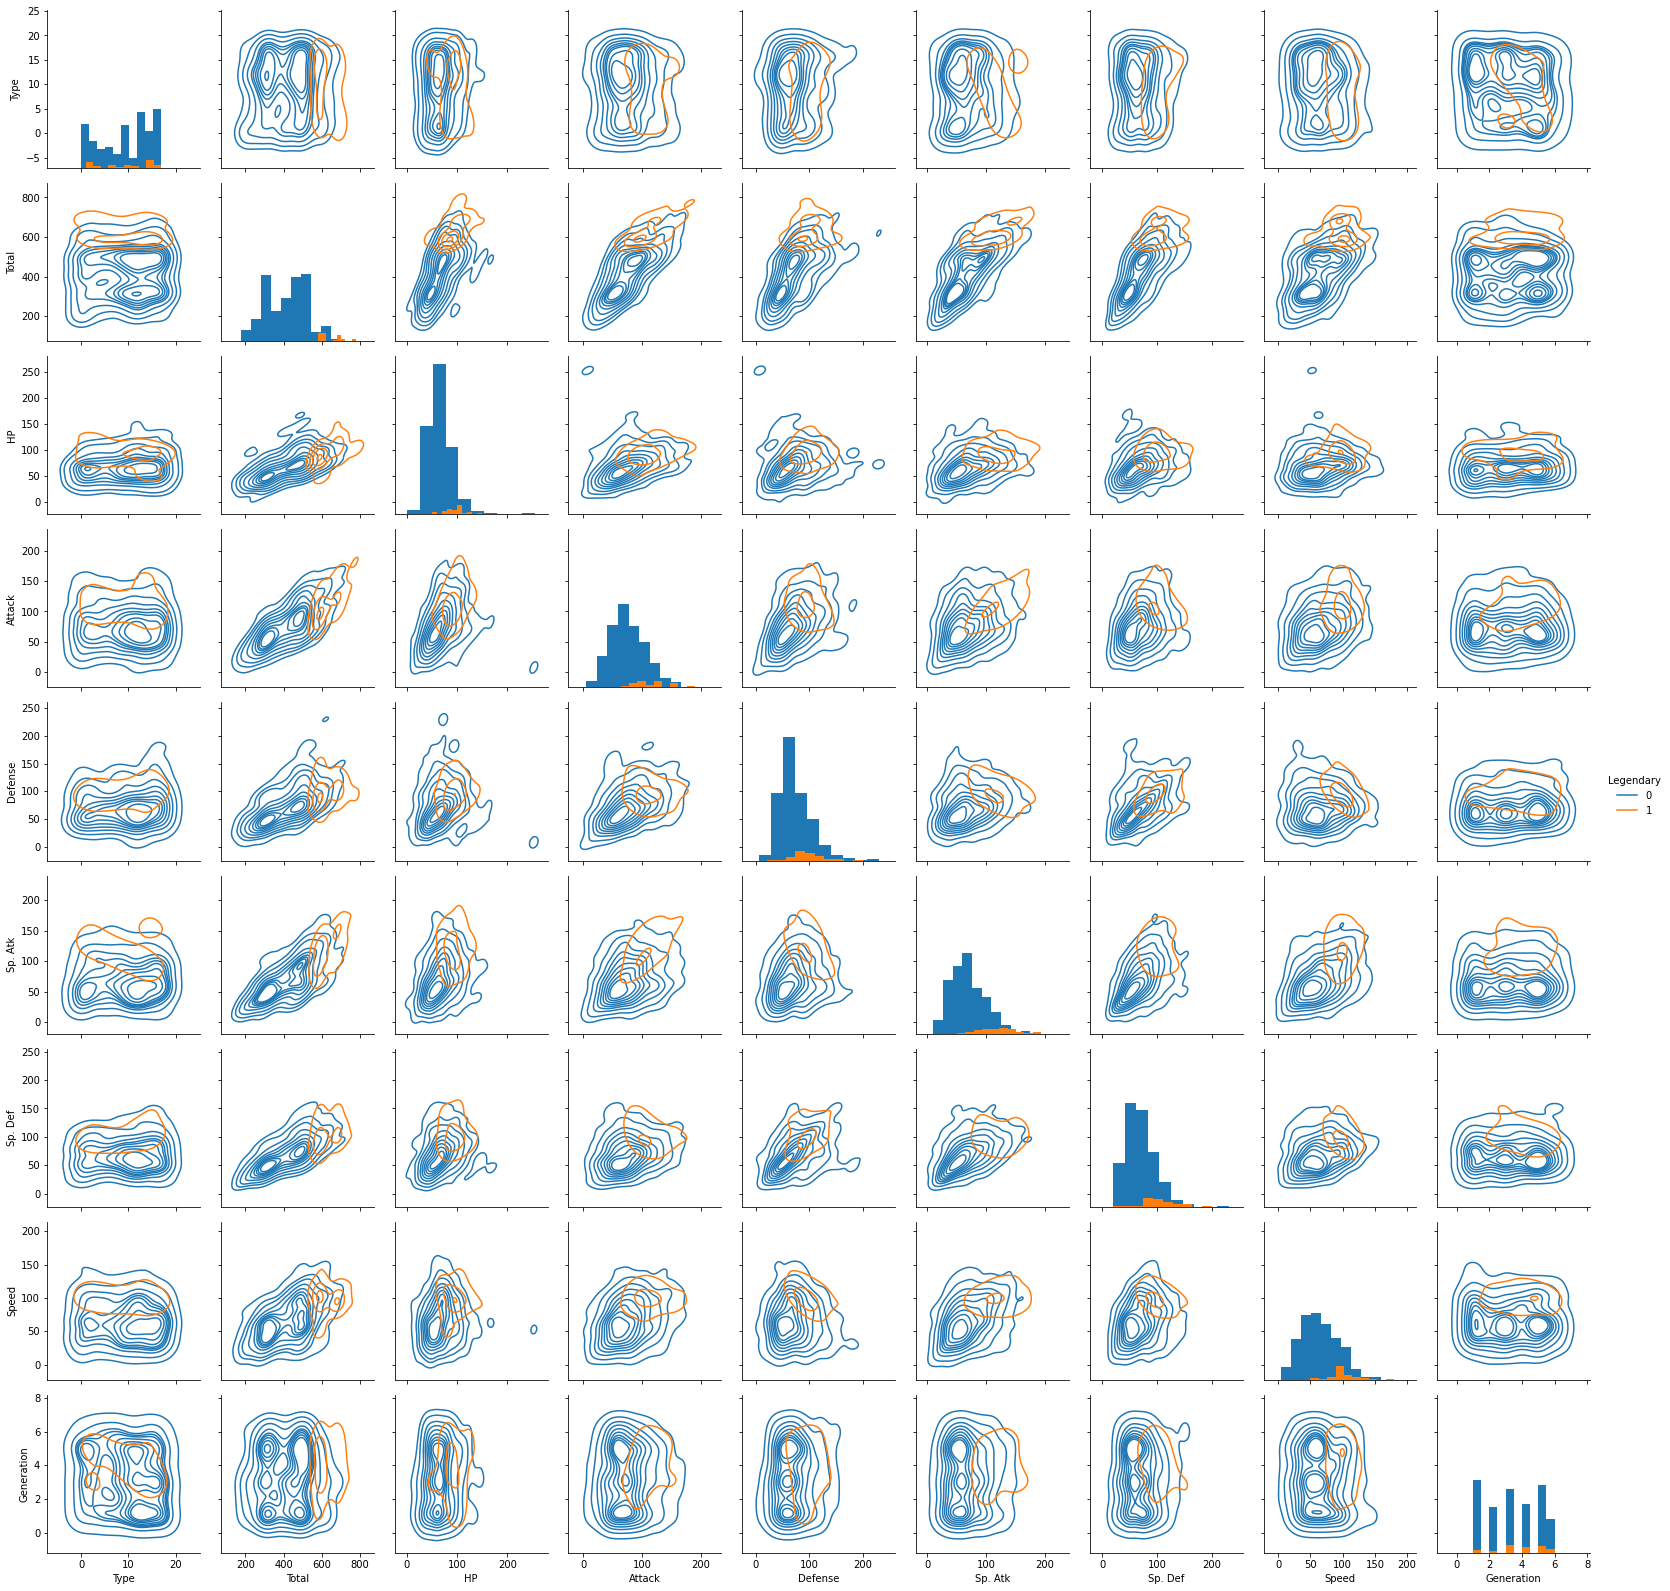

In [12]:
x = sns.PairGrid(df, hue = "Legendary")
x = x.map_diag(plt.hist)
x = x.map_upper(sns.kdeplot)
x = x.map_lower(sns.kdeplot)
x = x.add_legend()

##### As the labels are overlaping, there is little chance of Linear Regressor to be successfull.

In [13]:
df.groupby(["Legendary"]).count()

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Legendary,,,,,,,,,,
0,735,735,735,735,735,735,735,735,735,735
1,65,65,65,65,65,65,65,65,65,65


##### Number of non Legendary Pokemons is much higher than Legendary Pokemons

In [14]:
x = df.drop(["Name", "Legendary"], axis = 1)

In [15]:
y = df["Legendary"]

In [16]:
x = x.values
y = y.values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### Applying Linrear Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(x_train, y_train)

C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score = model.score(x_test,y_test)

In [25]:
print(r2_score*100,'%')

89.375 %


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test, y_pred)

array([[140,   5],
       [ 12,   3]], dtype=int64)

#### Though r2_score is high but prediction of Legendary Pokemon is very low.

### Applying Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(n_estimators = 3, criterion = "entropy")

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [31]:
y_pred = model.predict(x_test)

In [32]:
r2_score = model.score(x_test,y_test)

In [33]:
print(r2_score*100,'%')

92.5 %


In [34]:
confusion_matrix(y_test, y_pred)

array([[141,   4],
       [  8,   7]], dtype=int64)

#### Just like Linear Regression, in Radom Forest too, r2_score is high but prediction of Legendary Pokemon is low.

### Applying KNeighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model = KNeighborsClassifier(n_neighbors=3)

In [37]:
model.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = model.predict(x_test)

In [39]:
r2_score = model.score(x_test,y_test)

In [40]:
print(r2_score*100,'%')

96.875 %


In [41]:
confusion_matrix(y_test, y_pred)

array([[143,   2],
       [  3,  12]], dtype=int64)

#### Both r2_score and prediction of Legendary Pokemon is high.

### Pickling the trained KNeighbors Classifier model

In [42]:
import pickle

In [43]:
with open("Model", "wb") as f:
    pickle.dump(model,f)